# Introduction to Forecasting

We fit various smoothing models to existing data. The purpose behind this is to predict what happens next.

**airline_passengers.csv**

## Holt Winters Method

### <font color=blue>Simple Exponential Smoothing / Simple Moving Average</font>
This is the simplest to forecast. $\hat{y}$ is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.
### <font color=blue>Double Exponential Smoothing / Holt's Method</font>
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.
### <font color=blue>Triple Exponential Smoothing / Holt-Winters Method</font>
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [5]:
#setting the index frequency so that statsmodel works 
df.index.freq='MS'  # MS -- monthly start

In [6]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
# Goes till december 1960
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [8]:
#how many entries
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


### Train Test Split

In [9]:
train_data = df.iloc[:108] # Goes up to but not including 108
test_data = df.iloc[108:]

#Test set will be the most recent end of the data
#The test size is about 20% of the total sample, although this value depends on how long the sample is and how far you want to forecast
#The test set should ideally be atleast as large as the maximum focecast horizon required
#But remember, the longer the forecast horizon, the more likely you prediction becomes less accurate

#can also do using .loc[:'1940-01-01']

### Fitting the model

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()


#Multiplicative or Additive Trend
#Seasonal Periods is 12 months as we have data for 12 months in a year

C:\Users\pulkit\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\pulkit\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


### Evaluating Model against Test Set

In [12]:
#prediction 3 years into the future
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

#.rename changes the names of the series

In [13]:
test_predictions

1958-01-01    356.968597
1958-02-01    344.588797
1958-03-01    405.718347
1958-04-01    400.610861
1958-05-01    409.001702
1958-06-01    480.694209
1958-07-01    530.470073
1958-08-01    523.288533
1958-09-01    454.210575
1958-10-01    392.518114
1958-11-01    345.928390
1958-12-01    396.605139
1959-01-01    408.958859
1959-02-01    394.776017
1959-03-01    464.808707
1959-04-01    458.957347
1959-05-01    468.570262
1959-06-01    550.704338
1959-07-01    607.729748
1959-08-01    599.502261
1959-09-01    520.363527
1959-10-01    449.685942
1959-11-01    396.310714
1959-12-01    454.368217
1960-01-01    468.521179
1960-02-01    452.272694
1960-03-01    532.505211
1960-04-01    525.801637
1960-05-01    536.814614
1960-06-01    630.911008
1960-07-01    696.241815
1960-08-01    686.816045
1960-09-01    596.151246
1960-10-01    515.179909
1960-11-01    454.030910
1960-12-01    520.544128
Freq: MS, Name: HW Forecast, dtype: float64

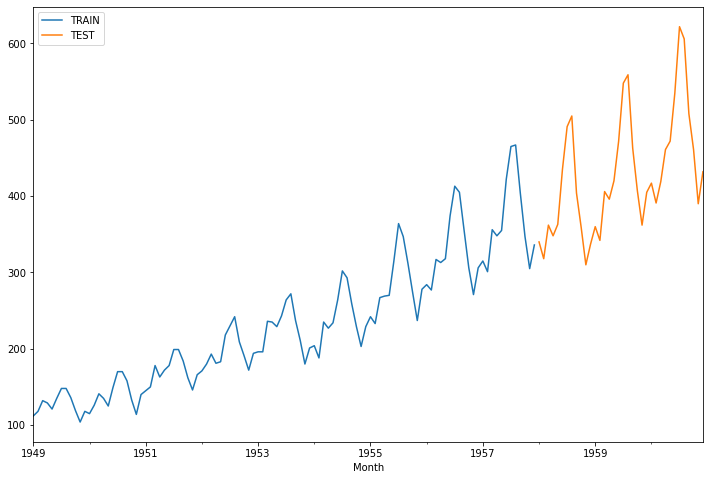

In [14]:
#visualisation of train and test data
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

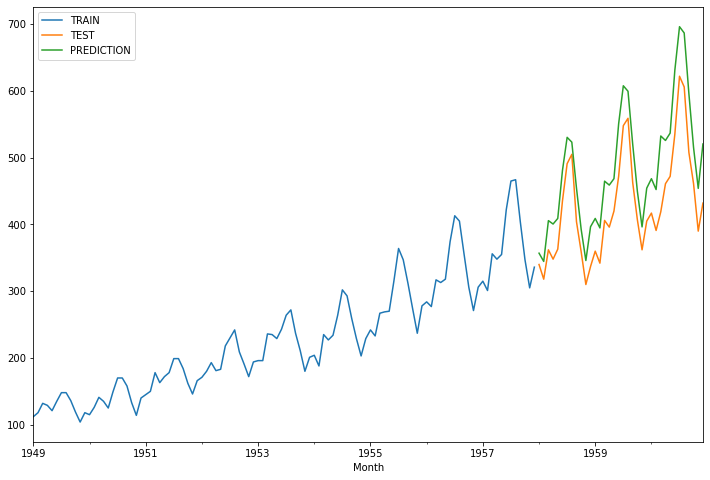

In [15]:
#visualisation with predictions(from the model)
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

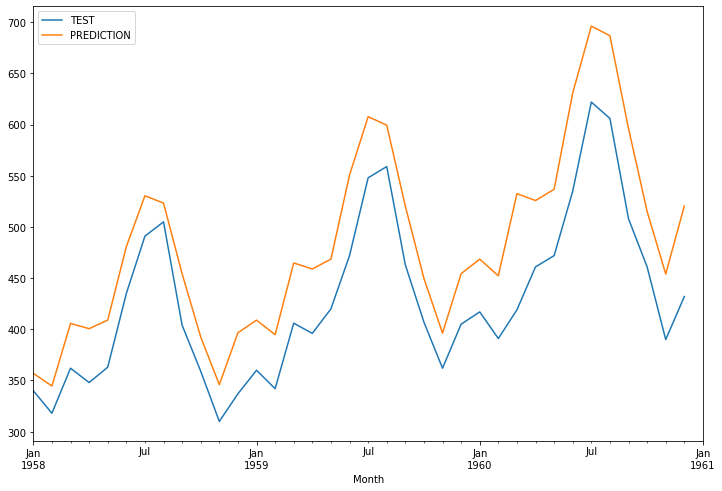

In [16]:
#Range that we predicted for (test vs prediction)
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

### Evaluation for Time Stamp data (Regression)

* Mean Absolute Error
* Mean Squared Error
* Root Mean Square Error

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [18]:
#Mean absolute error
mean_absolute_error(test_data,test_predictions)

#issue with MAE is that simply averaging the residuals won't alert us if the forecast was really off for few points
#We want to be aware of any prediction errors that are very large(if there only a few)

55.6980464742342

In [19]:
#Mean squared error
mean_squared_error(test_data,test_predictions)

#Large errors are noted, making MSE more popular (if error 20, then the error will become 20*20=400)
#But again there is issue with MSE
#Because we sqaured the residual, the units are now also squared
#Eg--If we forecast units was in dollars, MSE returns back an error in units of dollars squared, which is hard to interpret

3525.896528642991

In [20]:
#Root mean squared error
np.sqrt(mean_squared_error(test_data,test_predictions))

#RMSE fixes the issue with Mean squared error
#Our RMSE is less than the std of the true data,it means we are performing quite well

59.3792600883759

In [21]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


### Forecasting into Future

In [22]:
#Training the model on the whole data
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\pulkit\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\pulkit\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [23]:
#For next 3 years
forecast_predictions = final_model.forecast(36)

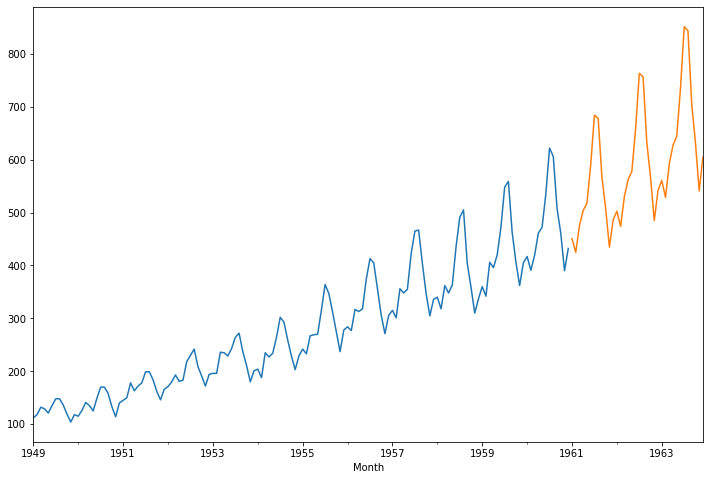

In [24]:
#Visualising real data with next predictions
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();

## Understanding Stationarity Concept (Additional)
Time series data is said to be stationary if it does not exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.

**samples.csv**

In [25]:
df2=pd.read_csv('Data/samples.csv',index_col=0,parse_dates=True)

In [26]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


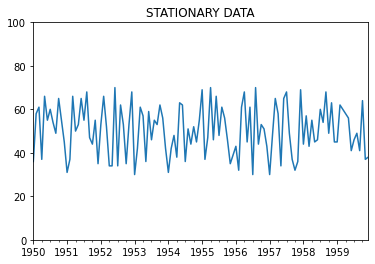

In [27]:
#Stationary Data
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);

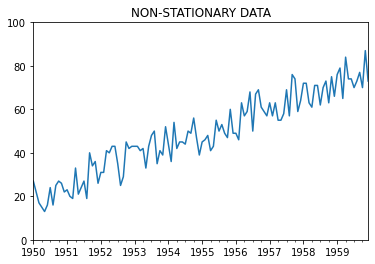

In [28]:
#Non-Stationary Data
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

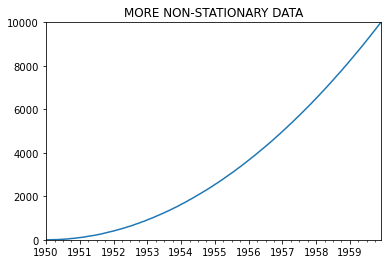

In [29]:
#More Non-Stationary Data
df2['c'].plot(ylim=[0,10000],title="MORE NON-STATIONARY DATA").autoscale(axis='x',tight=True);

## Understanding Differencing (Additional)
### First Order Differencing
Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

In this way a linear trend is transformed into a horizontal set of values.

In [30]:
# Calculate the first difference of the non-stationary dataset "b"
df2['d1b'] = df2['b'] - df2['b'].shift(1)

df2[['b','d1b']].head()


#Notice that differencing eliminates one or more rows of data from the beginning of the series.

,b,d1b
1950-01-01,27,NaN
1950-02-01,22,-5.0
1950-03-01,17,-5.0
1950-04-01,15,-2.0
1950-05-01,13,-2.0


In [31]:
#Doing it using function
from statsmodels.tsa.statespace.tools import diff

In [32]:
diff(df2['b'],k_diff=1)
#K_diff is the order of the difference

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

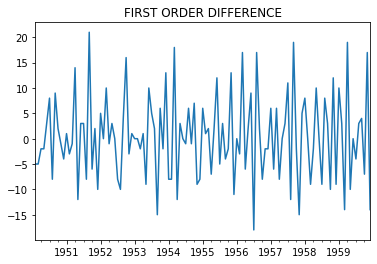

In [33]:
#First Order Difference
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

In [34]:
#An easier way to perform differencing on a pandas Series or DataFrame is to use the built-in .diff() method:
#For second order difference, use diff(2)
df2['d1b'] = df2['b'].diff()

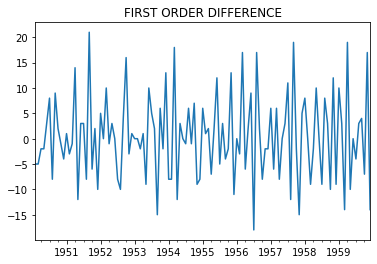

In [35]:
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);